In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import random as rnd
N = 5

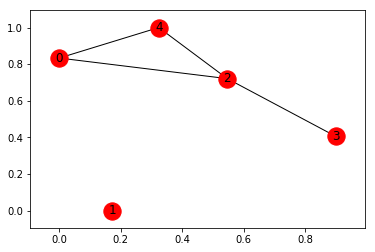

In [3]:
G=nx.gnp_random_graph(N,.2)
nx.draw_networkx(G)
plt.show()

In [6]:
N = 15  # number of agent
p_sell =0.4
p_buy =0.4
num_play = 365*3

class Agent:
    def  __init__(self,id):
        self.id = id
        self.choice = None
        self.strategy = None # hold
        self.buy = p_buy
        self.sell = p_sell

def count(agent_list):
    delta = sum(list(map(lambda agent:agent.strategy, agent_list)))
    return delta

def extract_influencers(G):
    agent_list = [Agent(id) for id in range(len(G))]
    PCT = 0.2 #choose as influencer from upper "pct" of degree centrality
    degree_centers = nx.degree_centrality(G)
    degree_list = sorted(degree_centers.items(), key=lambda x: x[1], reverse=True)
    influencers = [agent_list[degree_list[i][0]] for i in range(len(G))][0:int(len(G)*PCT)]
    return influencers

def  init_decision(agent_list):
    for focal in agent_list:
        r = rnd.random()
        if 0<= r<focal.buy:
            focal.choice = 'buy'
            focal.strategy = 1
        elif focal.buy<=r<=focal.buy+focal.sell:
            focal.choice = 'sell'
            focal.strategy = -1
        else: 
            focal.choice = 'hold'
            focal.strategy= 0
[extract_influencers(G)[i].id for i in range(len(extract_influencers(G)))]

agent_list = [Agent(id) for id in range(len(G))]
init_decision(agent_list)

In [7]:
opinions = [{"buy":0,"sell":0,"hold":0} for i in range(len(G))] # reset opinions
influencers = extract_influencers(G)
init_decision(agent_list)
for infl in influencers:
    for focal in G.neighbors(infl.id) :
        opinions[focal][infl.choice] +=1 
print([i.id for i in influencers] )        
print([influencers[i].choice for i in range(len(influencers))])
print(opinions)

KeyError: None

In [484]:
DPROB = 1     #拡散確率
influencers = extract_influencers(G)
influencers_list = [i.id for i in influencers]   
print("init decision",[agent_list[i].choice for i in range(len(G))])
print("influencer",influencers_list)
print ("influencer's choice",[agent_list[i].choice for i in influencers_list])


informed = []
informed.extend(influencers_list) # 始めにインフルエンサーを格納しておく
state = "ongoing" # state is "ongoing" or "end". if "ongoing" difussion go next step otherewise finish.

while state == "ongoing":
    state = "end"

    # opinions の中にインフルエンサーによる決断の影響を格納
    opinions = [{"buy":0,"sell":0,"hold":0} for i in range(len(G))] # reset opinions
    #print("inf list",[i.id for i in influencers])
    for infl in influencers:
        for focal in G.neighbors(infl.id) :
            opinions[focal][infl.choice] +=1 
    influencers = [] # reset
    #print("opinion",opinions)

    for focal in agent_list:
        if focal.id not in informed:
            i = focal.id
            if opinions[i]['sell']!=0 or opinions[i]['buy']!=0 or opinions[i]['hold']!=0:
                r = rnd.random()
                if 0< r < DPROB: # 同調する場合
                    buy_p = opinions[i]['buy'] /(opinions[i]['sell']+opinions[i]['buy']+ opinions[i]['hold'])
                    sell_p = opinions[i]['sell'] /(opinions[i]['sell']+opinions[i]['buy']+ opinions[i]['hold'])
                    hold_p = opinions[i]['hold'] /(opinions[i]['sell']+opinions[i]['buy']+ opinions[i]['hold'])
                    print(buy_p,sell_p,hold_p)
                    if 0<= r<buy_p:
                        focal.choice = 'buy'
                        focal.strategy = 1
                    elif buy_p<=r<=buy_p+sell_p:
                        focal.choice = 'sell'
                        focal.strategy = -1
                    else: 
                        focal.choice = 'hold'
                        focal.strategy= 0
                state = "ongoing" # 次の拡散へ続く
                informed.append(i)

                influencers.append(agent_list[i])

IC_model_herding(G)

0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
init decision ['buy', 'sell', 'sell', 'buy', 'sell']
influencer [4]
influencer's choice ['sell']
inf list [4]
inf choice ['sell']
opinion [{'buy': 0, 'sell': 1, 'hold': 0}, {'buy': 0, 'sell': 0, 'hold': 0}, {'buy': 0, 'sell': 1, 'hold': 0}, {'buy': 0, 'sell': 1, 'hold': 0}, {'buy': 0, 'sell': 0, 'hold': 0}]
0.0 1.0 0.0
0.0 1.0 0.0
0.0 1.0 0.0
inf list [0, 2, 3]
inf choice ['sell', 'sell', 'sell']
inf choice ['sell', 'sell', 'sell']
inf choice ['sell', 'sell', 'sell']
opinion [{'buy': 0, 'sell': 0, 'hold': 0}, {'buy': 0, 'sell': 0, 'hold': 0}, {'buy': 0, 'sell': 0, 'hold': 0}, {'buy': 0, 'sell': 0, 'hold': 0}, {'buy': 0, 'sell': 3, 'hold': 0}]
['sell', 'sell', 'sell', 'sell', 'sell']


In [201]:
def priceSeries(G): 
    agent_list = [Agent(id) for id in range(N)]
    price = 0
    prices = [price]
    hub = find_hub(G)
    inflencers, lengths = find_influencer(G, hub)
    for play in range(num_play):
        decision(agent_list)
        update_strategy(agent_list, inflencers, lengths)
        delta = count(agent_list)
        price +=delta
        prices.append(price)

1
4
5
6


In [447]:
agent_list = [Agent(id) for id in range(len(G))]
init_decision(agent_list)
influencers = extract_influencers(G)
influencers_list = [i.id for i in influencers]   
print("init decision",[agent_list[i].choice for i in range(len(G))])
print("influencer",influencers_list)
print ("influencer's choice",[agent_list[i].choice for i in influencers_list])

informed = []
informed.extend(influencers_list) # 始めにインフルエンサーを格納しておく
state = "ongoing" # state is "ongoing" or "end". if "ongoing" difussion go next step otherewise finish.

while state == "ongoing":
    state = "end"
    # opinions の中にインフルエンサーによる決断の影響を格納
    opinions = [{"buy":0,"sell":0,"hold":0} for i in range(len(G))] # reset opinions
    print("inf list",[i.id for i in influencers])
    for infl in influencers:
        print ("inf choice",[i.choice for i in influencers])
        for focal in G.neighbors(infl.id) :
            opinions[focal][infl.choice] +=1 
    influencers = [] # reset
    print("opinion",opinions)
    

init decision ['sell', 'sell', 'buy', 'sell', 'sell']
influencer [1]
influencer's choice ['sell']
inf list [1]
inf choice ['sell']
opinion [{'buy': 0, 'sell': 0, 'hold': 0}, {'buy': 0, 'sell': 0, 'hold': 0}, {'buy': 0, 'sell': 1, 'hold': 0}, {'buy': 0, 'sell': 1, 'hold': 0}, {'buy': 0, 'sell': 1, 'hold': 0}]


In [448]:
num =-1
while num<0:
    print(i)

8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8


KeyboardInterrupt: 